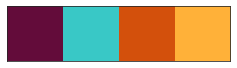

In [34]:
import numpy as np
import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)



In [35]:
import csv
file = open('C:/Users/Akschaya balaji/Downloads/dataset (1).csv')

type(file)
csvreader = csv.reader(file)
header = []
header = next(csvreader)
header

['Encounter_ID',
 'Provider_ID',
 'Provider_NPI',
 'Clinic_ID',
 'Encounter_DateTime',
 'Encounter_Description',
 'CC',
 'Patient_DOB',
 'Patient_Gender',
 'Provider_Name',
 'Specialty',
 'Clinic_Type',
 'lab_orders_count',
 'lab_results_count',
 'medication_orders_count',
 'medication_fulfillment_count',
 'vital_sign_count',
 'therapy_orders_count',
 'therapy_actions_count',
 'immunization_count',
 'Has_Appt',
 'Disposition',
 'code',
 'vocab',
 'description',
 'severity',
 'Member_ID',
 'Date_Collected',
 'Test_ID',
 'Specialty',
 'Panel',
 'Test_LOINC',
 'Test_Name',
 'Date_Resulted',
 'Specimen',
 'Result_LOINC',
 'Result_Name',
 'Result_Status',
 'Result_Description',
 'Numeric_Result',
 'Units',
 'Prescription',
 'Pharmacist_ID',
 'Pharmacy_Name',
 'Dispense_Date',
 'Drug_Name',
 'Drug_NDC',
 'Sig',
 'Dispense_Qty',
 'Fill_No',
 'Fill_Status',
 'Dose',
 'Units',
 'Days_Of_Supply']

In [9]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

In [ ]:
def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

In [ ]:
def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(1,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

In [ ]:
# Gets data and k, returns a list of center points.
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data)
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

In [ ]:
def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers)
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

In [ ]:

centers = train_k_means_clustering(data, k=4, epochs=5)
kmeans = predict_k_means_clustering(point, centers)

C:\Users\Akschaya balaji\Anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


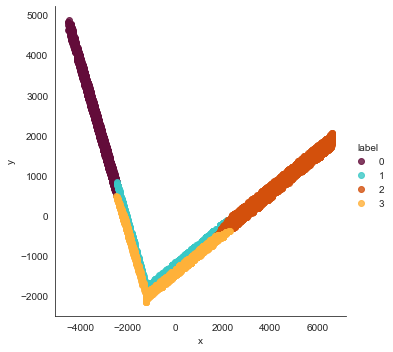

In [33]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)